<a href="https://colab.research.google.com/github/ckj241/quantumfinance/blob/master/wave_equation_200818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
aapl = pd.read_csv('https://raw.githubusercontent.com/ckj241/quantumfinance/master/AAPL_170818_200818.csv')
tsla = pd.read_csv('https://raw.githubusercontent.com/ckj241/quantumfinance/master/TSLA_170818_200818.csv')
usdhkd = pd.read_csv('https://raw.githubusercontent.com/ckj241/quantumfinance/master/USDHKD_170818_200818.csv')
usdkrw = pd.read_csv('https://raw.githubusercontent.com/ckj241/quantumfinance/master/USDKRW_170818_200818.csv')
eurdkk = pd.read_csv('https://raw.githubusercontent.com/ckj241/quantumfinance/master/EURDKK_170818_200818.csv')

In [65]:
df1 = pd.DataFrame(usdhkd).set_index('Date').head(68)
df1 = df1['Open'].dropna()
print(df1)

Date
2017-08-18    7.82340
2017-08-21    7.82274
2017-08-22    7.82308
2017-08-23    7.82551
2017-08-24    7.82498
               ...   
2017-11-14    7.80113
2017-11-15    7.80304
2017-11-17    7.80954
2017-11-20    7.81170
2017-11-21    7.81104
Name: Open, Length: 67, dtype: float64


In [78]:
def wave_eq(data, col, name):
  df = pd.DataFrame(data).set_index('Date')
  df = df.dropna()
  oc = df['Open']/df['Close']
  rr = np.array(oc)
  rr_int = np.linspace(np.min(rr), np.max(rr), 100)
  y = np.zeros(100)

  for r in rr:
    j = 0
    while j < len(rr_int):
      if rr_int[99] <= r:
        y[99] += 1/(len(rr))
        break
      if r >= rr_int[j] and r < rr_int[j+1]:
        y[j] += 1/(len(rr))
      j += 1
  plt.plot(rr_int, y, label = '%s' % name,  c = '%s' % col)
  #plt.boxplot(rr_int, y)
  plt.title('wave equation', pad = 10)
  plt.xticks(np.linspace(np.min(rr), np.max(rr), 30))
  plt.legend(loc='upper right')
  plt.show()
  print("mean :", rr_int[list(y).index(np.max(y))])

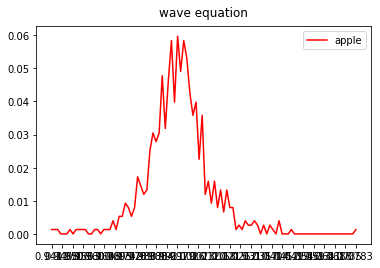

mean : 0.9979050206519992


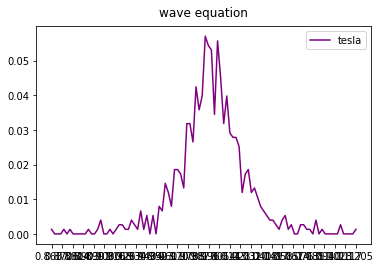

mean : 0.9934192015006212


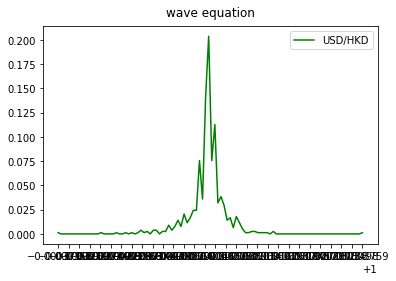

mean : 0.9999946366093166


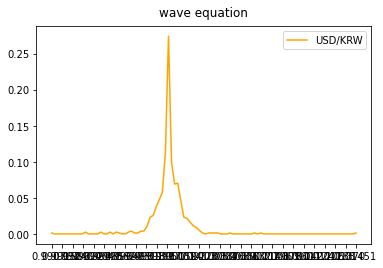

mean : 0.9998770861086617


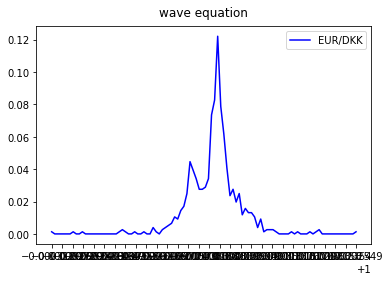

mean : 0.9999972173217738


In [79]:
wave_eq(aapl, 'red', 'apple')
wave_eq(tsla, 'purple', 'tesla')
wave_eq(usdhkd, 'green', 'USD/HKD')
wave_eq(usdkrw, 'orange', 'USD/KRW')
wave_eq(eurdkk, 'blue', 'EUR/DKK')

In [5]:


df_aapl = pd.DataFrame(aapl).set_index('Date')

In [8]:
aapl_oc = df_aapl[['Open', 'Close']]
aapl_oc['return'] = aapl_oc['Open'] / aapl_oc['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
aapl_oc

,Open,Close,return
Date,,,
2017-08-18,157.860001,157.500000,1.002286
2017-08-21,157.500000,157.210007,1.001845
2017-08-22,158.229996,159.779999,0.990299
2017-08-23,159.070007,159.979996,0.994312
2017-08-24,160.429993,159.270004,1.007283
...,...,...,...
2020-08-11,447.880005,437.500000,1.023726
2020-08-12,441.989990,452.040009,0.977767
2020-08-13,457.720001,460.040009,0.994957


In [11]:
aapl_r = np.array(aapl_oc['return'])

In [14]:
aapl_oc['return'].describe()

count    754.000000
mean       0.998930
std        0.013971
min        0.941103
25%        0.991419
50%        0.998863
75%        1.005747
max        1.078259
Name: return, dtype: float64

In [15]:
aapl_int = np.linspace(np.min(aapl_r), np.max(aapl_r), 100)

In [17]:
y = np.zeros(100)

In [19]:

for r in aapl_r:
    i = 0
    while i < len(aapl_int):
        if r >= aapl_int[99]:
            y[99] += 1
            break
        if r >= aapl_int[i] and r < aapl_int[i+1]:
            y[i] += 1
        i += 1



[ 2.  2.  2.  0.  0.  0.  2.  0.  2.  2.  2.  2.  0.  0.  2.  2.  0.  2.
  2.  2.  6.  2.  8.  8. 14. 12.  8. 12. 26. 22. 18. 20. 38. 46. 42. 46.
 72. 48. 70. 88. 60. 90. 74. 88. 80. 64. 54. 60. 34. 54. 18. 24. 14. 24.
 12. 20. 10. 20. 12. 12.  2.  4.  2.  6.  4.  4.  6.  4.  0.  4.  0.  4.
  2.  0.  6.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
754


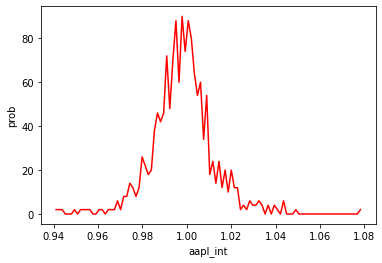

In [23]:
plt.xlabel('aapl_int')
plt.ylabel('prob')
plt.plot(aapl_int, y, color='red')
plt.show()